<a href="https://www.kaggle.com/code/yatinaggarwal033/linear-regression-using-algebra?scriptVersionId=120506943" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/random-linear-regression/train.csv
/kaggle/input/random-linear-regression/test.csv


In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [3]:
#importing data
test = pd.read_csv('/kaggle/input/random-linear-regression/test.csv').dropna(axis=0)
train = pd.read_csv('/kaggle/input/random-linear-regression/train.csv').dropna(axis = 0 )
print (test)
print (train)

      x          y
0    77  79.775152
1    21  23.177279
2    22  25.609262
3    20  17.857388
4    36  41.849864
..   ..        ...
295  71  68.545888
296  46  47.334876
297  55  54.090637
298  62  63.297171
299  47  52.459467

[300 rows x 2 columns]
        x          y
0    24.0  21.549452
1    50.0  47.464463
2    15.0  17.218656
3    38.0  36.586398
4    87.0  87.288984
..    ...        ...
695  58.0  58.595006
696  93.0  94.625094
697  82.0  88.603770
698  66.0  63.648685
699  97.0  94.975266

[699 rows x 2 columns]


In [4]:
# retriving data from data frames
x = np.asarray(train['x'])
print (np.size(x))
y = np.asarray(train['y'])
print (np.size(y))

699
699


In [5]:
#mean normalising data
x = (x - np.mean(x))/np.std(x)

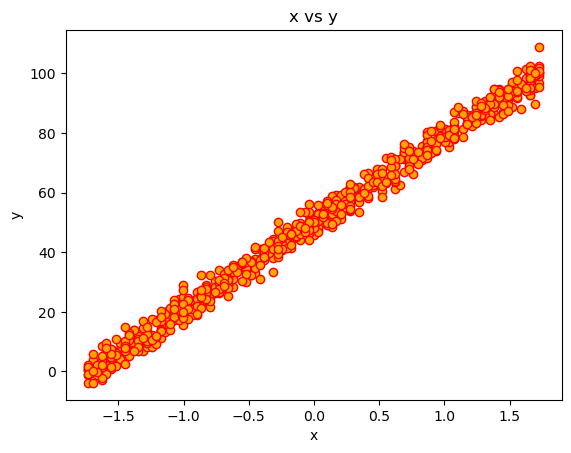

In [6]:
#graphical representation of data
plt.scatter(x=x, y = y,color='orange',edgecolor='red')
plt.title('x vs y')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [7]:
# assuming value of parameter w , b as 1
w = 1
b = 1
# y_hat is expected value of machine
y_hat = (w*x)+b

In [8]:
#loss function
def loss(x,y,w,b):
    m = np.size(x)
    error = 0 
    for i in range(0,m):
        f_i = (w*x[i])+b
        error += (f_i - y[i])**2 
    error = error/(2*m)
    return error

In [9]:
#loss in data
error = loss(x,y,w,b)
print (error)

1592.1697108850851


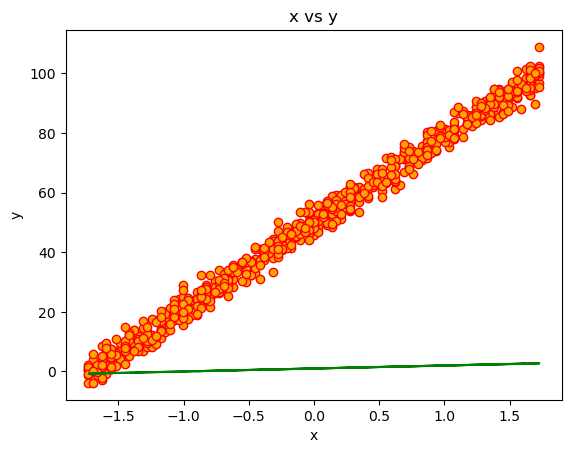

In [10]:
plt.plot(x, y_hat,color='green')
plt.scatter(x=x, y = y,color='orange',edgecolor='red')
plt.title('x vs y')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [11]:
#reducing gardient descent to reduce loss 
def gradient_descent(x,y,w,b):
    m = np.size(x)
    dw = 0 
    db = 0
    for i in range (m):
        f_i = x[i]*w + b
        dj_dw_i  = (f_i - y[i])*x[i]
        dj_db_i = (f_i - y[i] )
        db += dj_db_i
        dw += dj_dw_i
    dw = dw/m
    db = db/m
    return dw,db

In [12]:
# taking learning rate alpha as 0.1
for j in range (8000):
    dw,db = gradient_descent(x,y,w,b)
    w = w - 0.1*dw
    b = b - 0.1*db
print(w)
print (b)

28.952833033793826
49.93986917045777


In [13]:
#loss after gradient descent
error = loss(x,y,w,b)
print (error)

3.9338763667438417


In [14]:
# expectd value of machine after gradiebt descent
y_hat = (w*x)+b

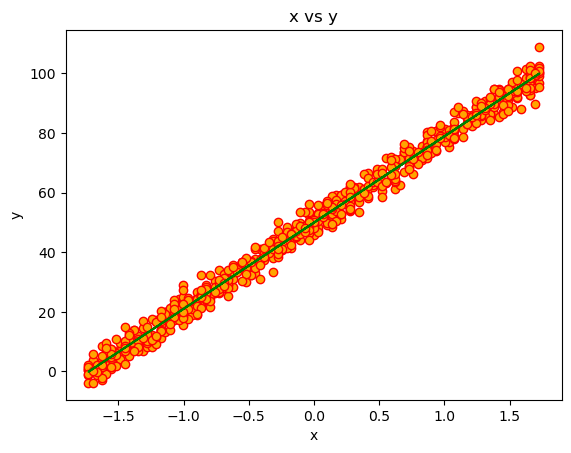

In [15]:
plt.plot(x, y_hat,color='green')
plt.scatter(x=x, y = y,color='orange',edgecolor='red')
plt.title('x vs y')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [16]:
#importing test data in numpy array
X = np.asarray(test['x'])
print (np.size(X))
Y = np.asarray(test['y'])
print (np.size(Y))

300
300


In [17]:
#z score normalisation on test data
X = (X - np.mean(X))/np.std(X)

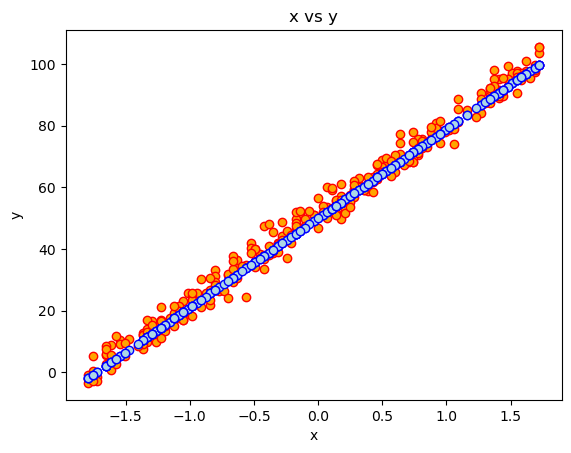

In [18]:
#graph of original vs expected values
plt.scatter(x=X, y = Y,color='orange',edgecolor='red')
plt.scatter(x=X, y = w*X+b,color='lightblue',edgecolor='blue')
plt.title('x vs y')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [19]:
# loss on test data
error = loss(X,Y,w,b)
print (error)

5.3863723852152
